# 神经网络解决多分类问题
手写数字识别，这次需要我们自己训练权重

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize

In [96]:
#数据集
path = '/home/alex/test/NG_exercise/ex4_neuralNetwork(BP)/ex4data1.mat'
data = sio.loadmat(path)

In [97]:
raw_x = data['X'] #存放图片数据
raw_y = data['y'] #存放期望结果（数字）
raw_y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [98]:
raw_x[0:1,:]#打印第一行看下图片数据

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [99]:
raw_x.shape,raw_y.shape  #20*20的图片

((5000, 400), (5000, 1))

In [100]:
#在第一列（第二维度的第一个元素位置）添加偏置向量
X = np.insert(raw_x, 0, values=1, axis=1)
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [101]:
X.shape

(5000, 401)

### 对y进行热编码处理：one-hot编码

In [102]:
def one_hot_encoder(raw_y):
    
    result = []
    
    for i in raw_y: #raw_y存放的是1～10的数字
        y_temp = np.zeros(10)
        y_temp[i-1] = 1  #十个数字中只有一个是1
#         print(type(y_temp))
        result.append(y_temp)
        
    return np.array(result) 

In [103]:
y = one_hot_encoder(raw_y)

In [104]:
y.shape,raw_y.shape

((5000, 10), (5000, 1))

In [105]:
#存放权重的初始化参数
path1 = '/home/alex/test/NG_exercise/ex4_neuralNetwork(BP)/ex4weights.mat'
theta = sio.loadmat(path1)
theta  

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
         -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
        [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
         -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
        [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
         -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
        ...,
        [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
          2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
        [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
         -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
        [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
         -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.057781

In [106]:
theta1 = theta['Theta1']
theta2 = theta['Theta2']

In [107]:
(theta1.shape,theta2.shape)
# theta1

((25, 401), (10, 26))

### 序列化权重参数

In [108]:
def serialize(a, b):
    c = np.append(a, b)
#     c = np.append(a.flatten(), b.flatten())

    print(type(c))
    return c

In [109]:
theta_serialize = serialize(theta1, theta2)

<class 'numpy.ndarray'>


In [110]:
theta_serialize.shape

(10285,)

In [111]:
theta_serialize

array([-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
       -2.47795788e-01,  1.28009118e+00, -1.32752042e+00])

### 解序列化权重参数

In [112]:
def deserialize(theta_serialize):
    theta1 = theta_serialize[:25*401].reshape(25,401)
    theta2 = theta_serialize[25*401:].reshape(10,26)
    return theta1,theta2

In [113]:
theta1,theta2 = deserialize(theta_serialize)

In [114]:
theta1.shape, theta2.shape
# theta1

((25, 401), (10, 26))

In [115]:
theta1

array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
        -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
       [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
        -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
       [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
        -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
       ...,
       [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
         2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
       [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
        -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
       [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
        -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]])

### 前向传播
计算损失用的

In [116]:
def sigmoid(z):
    return np.exp(z) / (1 + np.exp(z))

In [117]:
#从输入向输出计算估计,h是网络的输出，求偏差用的
def feed_forward(theta_serialize, X):
    theta1, theta2 = deserialize(theta_serialize)
    a1 = X              #5000*401
    z2 = a1@theta1.T    #5000*401 @ 401*25
    a2 = sigmoid(z2)    #5000*25
    a2 = np.insert(a2, 0, values=1, axis=1) #添加一维偏置
    z3 = a2@theta2.T    #5000*26  @ 26*10
    h = sigmoid(z3)     #5000*10  #这是我们得到的估计数值
    return a1,z2,a2,z3,h    

### 损失函数，
不带正则化

In [118]:
def cost(theta_serialize, X, y):
    a1,z2,a2,z3,h = feed_forward(theta_serialize, X)
    j = -np.sum(y*np.log(h) + (1-y)*np.log(1-h)) / len(X)
    return j

In [119]:
cost(theta_serialize, X, y)

0.2876291651613189

#### 损失函数，
带正则化，防止过拟合

In [120]:
#三层神经网络，有两层权重，故sum1,sum2
#偏置向量不放在正则化项里，就算放进去也不会有很大差距
def reg_cost(theta_serialize, x, y, lamda):
    sum1 = np.sum(np.power(theta1[:,1:], 2))
    sum2 = np.sum(np.power(theta2[:,1:], 2))
    reg = (sum1 + sum2) * lamda / (2*len(x))  #lamda控制theta
    return reg + cost(theta_serialize, X, y)

In [121]:
lamda = 1
reg_cost(theta_serialize, X, y, lamda)

0.38376985909092365

### 反向传播

In [122]:
def sigmoid_gradient(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [123]:
#这段梯度下降不是很明白
#误差反向传播
def gradient(theta_serialize, X, y):
    theta1, theta2 = deserialize(theta_serialize)
    a1,z2,a2,z3,h = feed_forward(theta_serialize, X)
    d3 = h - y #最后一层的误差
    d2 = d3 @ theta2[:,1:] * sigmoid_gradient(z2)  #(BP2公式)
    D2 = (d3.T @ a2) / len(X)  #代价函数对于第二层的偏导数  (BP4公式)
    D1 = (d2.T @ a1) / len(X)  #代价函数对于第一层的偏导数  (BP4)
    return serialize(D1, D2)   #

In [124]:
def reg_gredient(theta_serialize, X, y, lamda):
    D = gradient(theta_serialize, X, y)
    D1,D2 = deserialize(D)
    #加上正则化项，防止过拟合
    theta1,theta2 = deserialize(theta_serialize)
    D1[:,1:] = D1[:,1:] + theta1[:,1:] * lamda / len(X)
    D2[:,1:] = D2[:,1:] + theta2[:,1:] * lamda / len(X)
    
    return serialize(D1, D2)

#### 神经网络优化
优化权重theta1，theta2

In [125]:
from scipy.optimize import minimize

In [126]:
#以前是自己写梯度下降来求theta或者最小二乘法得到局部最优theta
#这里用现成的模块
def nn_training(X, y):
    #生成10285个±0.5之间的浮点数
    init_theta = np.random.uniform(-0.5, 0.5, 10285)
    #求极值
    res = minimize(fun = reg_cost,
                   x0 = init_theta,
                   args = (X, y, lamda),
                   method = 'TNC',
                   jac = reg_gredient,
                   options = {'maxiter':300})
    return res

In [127]:
lamda = 10
res = nn_training(X, y)
print(res)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

In [128]:
raw_y = data['y'].reshape(5000,)

In [129]:
_,_,_,_,h = feed_forward(res.x, X)
print(h)

#求第一维中取最大的数字
y_pred = np.argmax(h, axis=1) + 1
print('y_pred', y_pred[500:,])

acc = np.mean(y_pred == raw_y)

acc

[[2.20569925e-04 1.04758231e-02 8.18003551e-03 ... 4.76418435e-03
  4.93944083e-03 9.73736034e-01]
 [2.85401965e-04 6.80839088e-03 1.35604293e-02 ... 4.00948047e-03
  4.05264823e-03 9.54794578e-01]
 [3.94898514e-04 9.33136442e-03 1.33338875e-02 ... 5.38362752e-02
  6.76175421e-03 8.27683144e-01]
 ...
 [3.46092640e-02 2.15776417e-03 3.78886142e-02 ... 1.53051069e-02
  3.88758598e-01 1.81493953e-04]
 [2.57619007e-03 6.81741146e-04 2.23810673e-03 ... 5.04773477e-02
  8.43722519e-01 1.57271252e-03]
 [6.46592372e-04 7.34093330e-03 1.48666897e-03 ... 1.47006207e-02
  2.29290464e-01 1.49645775e-01]]
y_pred [1 1 1 ... 9 9 9]


0.94

#### 可视化隐藏层

In [130]:
def plot_hidden_layer(theta):
    theta1,_ = deserialize(theta)
    hidden_layer = theta1[:,1:] # 25×400  #偏置向量排除
    
    
    fig,ax = plt.subplots(ncols=5, nrows=5,figsize=(8,8), 
                           sharex=True, sharey=True
                         )
    
    for r in range(5):
        for c in range(5):
            #绘制第一维度中的数据，即0到24层
            ax[r,c].imshow(hidden_layer[5 * r + c].reshape(20,20).T,
                           cmap='gray_r'
                           )
            
    
#     plt.xticks([])
    plt.yticks([])
    
    plt.show

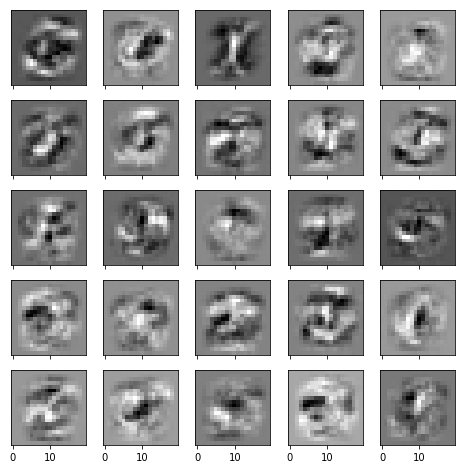

In [131]:
plot_hidden_layer(res.x)